<a href="https://colab.research.google.com/github/XNN19/CCN2024/blob/main/RSA/Part2_Relating_RSA_to_Procrustes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantifying Similarity between Neural Population Codes**

*Cognitive Computational Neuroscience*

*Keynotes and Tutorials*

*August 7, 2024*

# **Part 2: Relationship of Procrustes to RSA and CKA**

**Background Reading**

* Harvey SE, Larsen BW, Williams AH (2024). [Duality of Bures and Shape Distances with Implications for Comparing Neural Representations](https://proceedings.mlr.press/v243/harvey24a). *Proceedings of UniReps: the First Workshop on Unifying Representations in Neural Models* (pp. 11-26). PMLR.

In [ ]:
#@title Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
#@title Create custom colormap for plotting.
import matplotlib
cyclic_cmap = matplotlib.colors.ListedColormap(
    np.array([[0.91510904, 0.55114749, 0.67037311],
   [0.91696411, 0.55081563, 0.66264366],
   [0.91870995, 0.55055664, 0.65485881],
   [0.92034498, 0.55037149, 0.64702356],
   [0.92186763, 0.55026107, 0.63914306],
   [0.92327636, 0.55022625, 0.63122259],
   [0.9245696 , 0.55026781, 0.62326754],
   [0.92574582, 0.5503865 , 0.6152834 ],
   [0.92680349, 0.55058299, 0.6072758 ],
   [0.92774112, 0.55085789, 0.59925045],
   [0.9285572 , 0.55121174, 0.59121319],
   [0.92925027, 0.551645  , 0.58316992],
   [0.92981889, 0.55215808, 0.57512667],
   [0.93026165, 0.55275127, 0.56708953],
   [0.93057716, 0.5534248 , 0.55906469],
   [0.93076407, 0.55417883, 0.55105838],
   [0.93082107, 0.55501339, 0.54307696],
   [0.93074689, 0.55592845, 0.53512681],
   [0.9305403 , 0.55692387, 0.52721438],
   [0.93020012, 0.55799943, 0.51934621],
   [0.92972523, 0.55915477, 0.51152885],
   [0.92911454, 0.56038948, 0.50376893],
   [0.92836703, 0.56170301, 0.49607312],
   [0.92748175, 0.56309471, 0.48844813],
   [0.9264578 , 0.56456383, 0.48090073],
   [0.92529434, 0.56610951, 0.47343769],
   [0.92399062, 0.56773078, 0.46606586],
   [0.92254595, 0.56942656, 0.45879209],
   [0.92095971, 0.57119566, 0.4516233 ],
   [0.91923137, 0.5730368 , 0.44456642],
   [0.91736048, 0.57494856, 0.4376284 ],
   [0.91534665, 0.57692945, 0.43081625],
   [0.91318962, 0.57897785, 0.42413698],
   [0.91088917, 0.58109205, 0.41759765],
   [0.90844521, 0.58327024, 0.41120533],
   [0.90585771, 0.58551053, 0.40496711],
   [0.90312676, 0.5878109 , 0.3988901 ],
   [0.90025252, 0.59016928, 0.39298143],
   [0.89723527, 0.5925835 , 0.38724821],
   [0.89407538, 0.59505131, 0.38169756],
   [0.89077331, 0.59757038, 0.37633658],
   [0.88732963, 0.60013832, 0.37117234],
   [0.88374501, 0.60275266, 0.36621186],
   [0.88002022, 0.6054109 , 0.36146209],
   [0.87615612, 0.60811044, 0.35692989],
   [0.87215369, 0.61084868, 0.352622  ],
   [0.86801401, 0.61362295, 0.34854502],
   [0.86373824, 0.61643054, 0.34470535],
   [0.85932766, 0.61926872, 0.3411092 ],
   [0.85478365, 0.62213474, 0.3377625 ],
   [0.85010767, 0.6250258 , 0.33467091],
   [0.84530131, 0.62793914, 0.3318397 ],
   [0.84036623, 0.63087193, 0.32927381],
   [0.8353042 , 0.63382139, 0.32697771],
   [0.83011708, 0.63678472, 0.32495541],
   [0.82480682, 0.63975913, 0.32321038],
   [0.81937548, 0.64274185, 0.32174556],
   [0.81382519, 0.64573011, 0.32056327],
   [0.80815818, 0.6487212 , 0.31966522],
   [0.80237677, 0.65171241, 0.31905244],
   [0.79648336, 0.65470106, 0.31872531],
   [0.79048044, 0.65768455, 0.31868352],
   [0.78437059, 0.66066026, 0.31892606],
   [0.77815645, 0.66362567, 0.31945124],
   [0.77184076, 0.66657827, 0.32025669],
   [0.76542634, 0.66951562, 0.3213394 ],
   [0.75891609, 0.67243534, 0.32269572],
   [0.75231298, 0.67533509, 0.32432138],
   [0.74562004, 0.6782126 , 0.32621159],
   [0.73884042, 0.68106567, 0.32836102],
   [0.73197731, 0.68389214, 0.33076388],
   [0.72503398, 0.68668995, 0.33341395],
   [0.7180138 , 0.68945708, 0.33630465],
   [0.71092018, 0.69219158, 0.33942908],
   [0.70375663, 0.69489159, 0.34278007],
   [0.69652673, 0.69755529, 0.34635023],
   [0.68923414, 0.70018097, 0.35013201],
   [0.6818826 , 0.70276695, 0.35411772],
   [0.67447591, 0.70531165, 0.3582996 ],
   [0.667018  , 0.70781354, 0.36266984],
   [0.65951284, 0.71027119, 0.36722061],
   [0.65196451, 0.71268322, 0.37194411],
   [0.64437719, 0.71504832, 0.37683259],
   [0.63675512, 0.71736525, 0.38187838],
   [0.62910269, 0.71963286, 0.38707389],
   [0.62142435, 0.72185004, 0.39241165],
   [0.61372469, 0.72401576, 0.39788432],
   [0.60600841, 0.72612907, 0.40348469],
   [0.59828032, 0.72818906, 0.40920573],
   [0.59054536, 0.73019489, 0.41504052],
   [0.58280863, 0.73214581, 0.42098233],
   [0.57507535, 0.7340411 , 0.42702461],
   [0.5673509 , 0.7358801 , 0.43316094],
   [0.55964082, 0.73766224, 0.43938511],
   [0.55195081, 0.73938697, 0.44569104],
   [0.54428677, 0.74105381, 0.45207286],
   [0.53665478, 0.74266235, 0.45852483],
   [0.52906111, 0.74421221, 0.4650414 ],
   [0.52151225, 0.74570306, 0.47161718],
   [0.5140149 , 0.74713464, 0.47824691],
   [0.506576  , 0.74850672, 0.48492552],
   [0.49920271, 0.74981912, 0.49164808],
   [0.49190247, 0.75107171, 0.4984098 ],
   [0.48468293, 0.75226438, 0.50520604],
   [0.47755205, 0.7533971 , 0.51203229],
   [0.47051802, 0.75446984, 0.5188842 ],
   [0.46358932, 0.75548263, 0.52575752],
   [0.45677469, 0.75643553, 0.53264815],
   [0.45008317, 0.75732863, 0.5395521 ],
   [0.44352403, 0.75816207, 0.54646551],
   [0.43710682, 0.758936  , 0.55338462],
   [0.43084133, 0.7596506 , 0.56030581],
   [0.42473758, 0.76030611, 0.56722555],
   [0.41880579, 0.76090275, 0.5741404 ],
   [0.41305637, 0.76144081, 0.58104704],
   [0.40749984, 0.76192057, 0.58794226],
   [0.40214685, 0.76234235, 0.59482292],
   [0.39700806, 0.7627065 , 0.60168598],
   [0.39209414, 0.76301337, 0.6085285 ],
   [0.38741566, 0.76326334, 0.6153476 ],
   [0.38298304, 0.76345681, 0.62214052],
   [0.37880647, 0.7635942 , 0.62890454],
   [0.37489579, 0.76367593, 0.63563704],
   [0.37126045, 0.76370246, 0.64233547],
   [0.36790936, 0.76367425, 0.64899736],
   [0.36485083, 0.76359176, 0.6556203 ],
   [0.36209245, 0.76345549, 0.66220193],
   [0.359641  , 0.76326594, 0.66873999],
   [0.35750235, 0.76302361, 0.67523226],
   [0.35568141, 0.76272903, 0.68167659],
   [0.35418202, 0.76238272, 0.68807086],
   [0.3530069 , 0.76198523, 0.69441305],
   [0.35215761, 0.7615371 , 0.70070115],
   [0.35163454, 0.76103888, 0.70693324],
   [0.35143685, 0.76049114, 0.71310742],
   [0.35156253, 0.75989444, 0.71922184],
   [0.35200839, 0.75924936, 0.72527472],
   [0.3527701 , 0.75855647, 0.73126429],
   [0.3538423 , 0.75781637, 0.73718884],
   [0.3552186 , 0.75702964, 0.7430467 ],
   [0.35689171, 0.75619688, 0.74883624],
   [0.35885353, 0.75531868, 0.75455584],
   [0.36109522, 0.75439565, 0.76020396],
   [0.36360734, 0.75342839, 0.76577905],
   [0.36637995, 0.75241752, 0.77127961],
   [0.3694027 , 0.75136364, 0.77670417],
   [0.37266493, 0.75026738, 0.7820513 ],
   [0.37615579, 0.74912934, 0.78731957],
   [0.37986429, 0.74795017, 0.79250759],
   [0.38377944, 0.74673047, 0.797614  ],
   [0.38789026, 0.74547088, 0.80263746],
   [0.3921859 , 0.74417203, 0.80757663],
   [0.39665568, 0.74283455, 0.81243022],
   [0.40128912, 0.74145908, 0.81719695],
   [0.406076  , 0.74004626, 0.82187554],
   [0.41100641, 0.73859673, 0.82646476],
   [0.41607073, 0.73711114, 0.83096336],
   [0.4212597 , 0.73559013, 0.83537014],
   [0.42656439, 0.73403435, 0.83968388],
   [0.43197625, 0.73244447, 0.8439034 ],
   [0.43748708, 0.73082114, 0.84802751],
   [0.44308905, 0.72916502, 0.85205505],
   [0.44877471, 0.72747678, 0.85598486],
   [0.45453694, 0.72575709, 0.85981579],
   [0.46036897, 0.72400662, 0.8635467 ],
   [0.4662644 , 0.72222606, 0.86717646],
   [0.47221713, 0.72041608, 0.87070395],
   [0.47822138, 0.71857738, 0.87412804],
   [0.4842717 , 0.71671065, 0.87744763],
   [0.4903629 , 0.71481659, 0.88066162],
   [0.49649009, 0.71289591, 0.8837689 ],
   [0.50264864, 0.71094931, 0.88676838],
   [0.50883417, 0.70897752, 0.88965898],
   [0.51504253, 0.70698127, 0.89243961],
   [0.52126981, 0.70496128, 0.8951092 ],
   [0.52751231, 0.70291829, 0.89766666],
   [0.53376652, 0.70085306, 0.90011093],
   [0.54002912, 0.69876633, 0.90244095],
   [0.54629699, 0.69665888, 0.90465565],
   [0.55256715, 0.69453147, 0.90675397],
   [0.55883679, 0.69238489, 0.90873487],
   [0.56510323, 0.69021993, 0.9105973 ],
   [0.57136396, 0.68803739, 0.91234022],
   [0.57761655, 0.68583808, 0.91396258],
   [0.58385872, 0.68362282, 0.91546336],
   [0.59008831, 0.68139246, 0.91684154],
   [0.59630323, 0.67914782, 0.9180961 ],
   [0.60250152, 0.67688977, 0.91922603],
   [0.60868128, 0.67461918, 0.92023033],
   [0.61484071, 0.67233692, 0.921108  ],
   [0.62097809, 0.67004388, 0.92185807],
   [0.62709176, 0.66774097, 0.92247957],
   [0.63318012, 0.66542911, 0.92297153],
   [0.63924166, 0.66310923, 0.92333301],
   [0.64527488, 0.66078227, 0.92356308],
   [0.65127837, 0.65844919, 0.92366082],
   [0.65725076, 0.65611096, 0.92362532],
   [0.66319071, 0.65376857, 0.92345572],
   [0.66909691, 0.65142302, 0.92315115],
   [0.67496813, 0.64907533, 0.92271076],
   [0.68080311, 0.64672651, 0.92213374],
   [0.68660068, 0.64437763, 0.92141929],
   [0.69235965, 0.64202973, 0.92056665],
   [0.69807888, 0.6396839 , 0.91957507],
   [0.70375724, 0.63734122, 0.91844386],
   [0.70939361, 0.63500279, 0.91717232],
   [0.7149869 , 0.63266974, 0.91575983],
   [0.72053602, 0.63034321, 0.91420578],
   [0.72603991, 0.62802433, 0.9125096 ],
   [0.7314975 , 0.62571429, 0.91067077],
   [0.73690773, 0.62341425, 0.9086888 ],
   [0.74226956, 0.62112542, 0.90656328],
   [0.74758193, 0.61884899, 0.90429382],
   [0.75284381, 0.6165862 , 0.90188009],
   [0.75805413, 0.61433829, 0.89932181],
   [0.76321187, 0.6121065 , 0.89661877],
   [0.76831596, 0.6098921 , 0.89377082],
   [0.77336536, 0.60769637, 0.89077786],
   [0.77835901, 0.6055206 , 0.88763988],
   [0.78329583, 0.6033661 , 0.88435693],
   [0.78817477, 0.60123418, 0.88092913],
   [0.79299473, 0.59912616, 0.87735668],
   [0.79775462, 0.59704339, 0.87363986],
   [0.80245335, 0.59498722, 0.86977904],
   [0.8070898 , 0.592959  , 0.86577468],
   [0.81166284, 0.5909601 , 0.86162732],
   [0.81617134, 0.5889919 , 0.8573376 ],
   [0.82061414, 0.58705579, 0.85290625],
   [0.82499007, 0.58515315, 0.84833413],
   [0.82929796, 0.58328538, 0.84362217],
   [0.83353661, 0.58145389, 0.83877142],
   [0.8377048 , 0.57966009, 0.83378306],
   [0.8418013 , 0.57790538, 0.82865836],
   [0.84582486, 0.57619119, 0.82339871],
   [0.84977422, 0.57451892, 0.81800565],
   [0.85364809, 0.57289   , 0.8124808 ],
   [0.85744519, 0.57130585, 0.80682595],
   [0.86116418, 0.56976788, 0.80104298],
   [0.86480373, 0.56827749, 0.79513394],
   [0.86836249, 0.56683612, 0.789101  ],
   [0.87183909, 0.56544515, 0.78294645],
   [0.87523214, 0.56410599, 0.77667274],
   [0.87854024, 0.56282002, 0.77028247],
   [0.88176195, 0.56158863, 0.76377835],
   [0.88489584, 0.56041319, 0.75716326],
   [0.88794045, 0.55929505, 0.75044023],
   [0.89089432, 0.55823556, 0.74361241],
   [0.89375596, 0.55723605, 0.73668312],
   [0.89652387, 0.55629781, 0.72965583],
   [0.89919653, 0.55542215, 0.72253414],
   [0.90177242, 0.55461033, 0.71532181],
   [0.90425   , 0.55386358, 0.70802274],
   [0.90662774, 0.55318313, 0.70064098],
   [0.90890408, 0.55257016, 0.69318073],
   [0.91107745, 0.55202582, 0.68564633],
   [0.91314629, 0.55155124, 0.67804225]])
)

In [ ]:
#@title Re-used code from Part 1 to create simulated datasets
class PeriodicTuningCurves:

    def __init__(self, num_neurons, tuning_width, amplitude):
        self.centers = np.linspace(0, 2 * np.pi, num_neurons + 1)[:-1]
        self.num_neurons = num_neurons
        self.tuning_width = tuning_width
        self.amplitude = amplitude

    def __call__(self, theta):
        assert theta.ndim == 1
        scaling_factor = (self.amplitude / np.exp(1 / self.tuning_width))
        tuning = np.exp(
            -np.cos(self.centers[None, :] - theta[:, None]) / self.tuning_width
        )
        return scaling_factor * tuning


def randrot(num_dims, seed):
    """Creates a random orthogonal matrix."""
    rs = np.random.RandomState(seed)
    return np.linalg.qr(rs.randn(num_dims, num_dims))[0]

## **Summary of Procrustes Distance from Part 1**

In the last notebook we introduced the [Procrustes distance](https://en.wikipedia.org/wiki/Procrustes_analysis) as an approach to quantifying similarity in the geometry of two neural response manifolds. Recall the basic definition of the Procrustes distance:

\begin{equation}
d_{\text{Proc}}(\mathbf{X}, \mathbf{Y}) = \min_\mathbf{Q \in O(N)} \Vert \mathbf{CX} - \mathbf{CYQ} \Vert_F
\end{equation}

where $\mathbf{Q}$ is an $N \times N$ orthogonal matrix, and $\mathbf{X}$ and $\mathbf{Y}$ are $M \times N$ matrices holding neural responses across $M$ conditions and $N$ neurons in each network.
Left multiplication by the [centering matrix](https://en.wikipedia.org/wiki/Centering_matrix) $\mathbf{C}$ ensures that the columns of $\mathbf{X}$ and $\mathbf{Y}$ are mean zero. Geometrically, we think about the Procrustes distance as finding the optimal rotation and reflection that aligns two clouds of $M$ landmark points in an $N$-dimensional space.

To begin, let's use the same code from Part 1 to simulate data from one-dimensional neural response manifolds, organize these data into matrices $\mathbf{X}$ and $\mathbf{Y}$, and use PCA to visualize each manifold.

In [ ]:
#@title Define `X` and `Y` representation matrices

# Create two "neural networks" that map stimulus inputs to high-d outputs.
num_neurons = 100
rep_X = PeriodicTuningCurves(num_neurons, 0.5, 1.0)
rep_Y = PeriodicTuningCurves(num_neurons, 0.05, 1.0)

# A one-dimensional periodic stimulus
num_conditions = 200
thetas = np.linspace(-np.pi, np.pi, num_conditions)

# Evaluate the "neural networks" to get representation matrices
X = rep_X(thetas)   # num_conditions x num_neurons matrix
Y = rep_Y(thetas)   # num_conditions x num_neurons matrix

# Mean center columns of X and Y and apply random rotation
X = (X - np.mean(X, axis=0, keepdims=True)) @ randrot(num_neurons, 0)
Y = (Y - np.mean(Y, axis=0, keepdims=True)) @ randrot(num_neurons, 1)

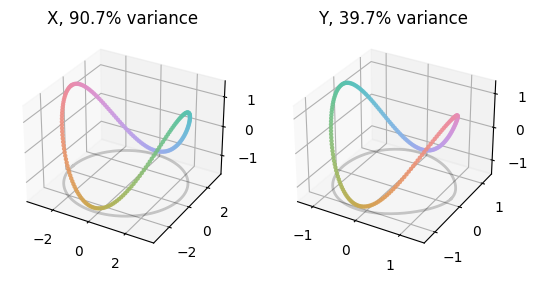

In [ ]:
#@title Plot Separate PCA Projections of `X` and `Y`.
pca_x= PCA(3).fit(X)
pca_y= PCA(3).fit(Y)

x1, x2, x3  = pca_x.transform(X).T
y1, y2, y3 = pca_y.fit_transform(Y).T

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.scatter(x1, x2, x3, c=thetas, cmap=cyclic_cmap, alpha=.9, lw=0, s=10)
ax2.scatter(y1, y2, y3, c=thetas, cmap=cyclic_cmap, alpha=.9, lw=0, s=10)
ax1.plot(x1, x2, np.full_like(x1, ax1.get_zlim()[0]), '-k', alpha=.2, lw=2)
ax2.plot(y1, y2, np.full_like(y1, ax2.get_zlim()[0]), '-k', alpha=.2, lw=2)

ax1.set_title('X, {0:.1f}% variance'.format(
    100 * np.sum(pca_x.explained_variance_ratio_)
))
ax2.set_title('Y, {0:.1f}% variance'.format(
    100 * np.sum(pca_y.explained_variance_ratio_)
));

## **Representational Similarity Analysis (RSA)**

Many in the cognitive computational neuroscience community are familiar with another approach, [Representational Similarity Analysis (RSA)](https://www.frontiersin.org/journals/systems-neuroscience/articles/10.3389/neuro.06.004.2008/full), that is also invariant to rotations of the neural responses.
In this notebook we will review the basic idea behind RSA and show how it is not only conceptually related to Procrustes distance, but *a certain variant of RSA is equal to the Procrustes distance* ([Harvey et al. 2024](https://proceedings.mlr.press/v243/harvey24a)).

The framework of RSA is quite general, and we will see that it can also be seen as closely related to [centered kernel alignment (CKA)](https://proceedings.mlr.press/v97/kornblith19a.html)&mdash;a popular technique for comparing representations in the deep learning literature.

In a nutshell RSA consists of two steps:

* **Step 1:** Compute $M \times M$ **representational dissimilarity matrices (RDMs)** for each network. Element $(i,j)$ in an RDM matrix is a measure of dissimilarity between a neural population response to condition $i$ and condition $j$.

* **Step 2:** Quantify the distance between two neural response manifolds as a measure of distance between their RDMs.

Below we show two example RDMs from [Kriegeskorte et al. (2008)](https://dx.doi.org/10.1016/j.neuron.2008.10.043) that demonstrate similarity in inferotemporal cortex (IT) population responses estimated from electrophysiological measurements in monkeys (left) and fMRI measurements in human subjects (right).

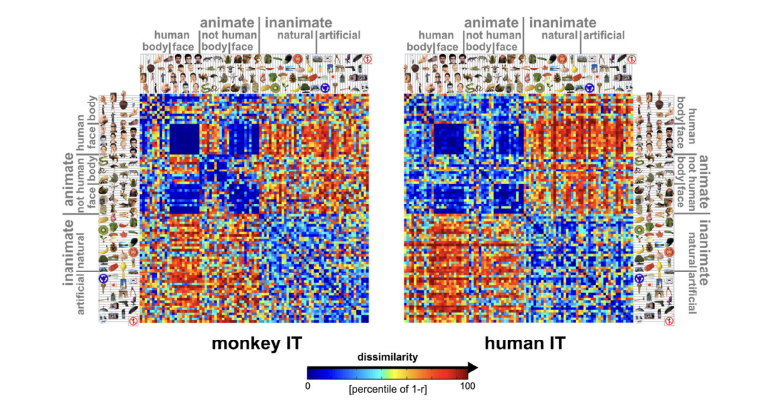

**RDMs are also invariant to rotations.** Let us compute RDMs using the *squared Euclidean distance* as our measure of within-network representational dissimilarity. Thus, the RDMs associated with our $M \times N$ response matrix $\mathbf{X}$ is an $M \times M$ matrix $\mathbf{D}_X$ with elements:

\begin{equation}
[\mathbf{D}_X]_{ij} = \Vert \mathbf{\tilde{x}}_i - \mathbf{\tilde{x}}_j \Vert_2^2
\end{equation}

where $\mathbf{\tilde{x}}_i$ and $\mathbf{\tilde{x}}_j$ denote rows $i$ and $j$ of $\mathbf{X}$.
A basic fact about Euclidean distance is that it is invariant to rotations, reflections, and translations.
Thus, for any $N \times N$ orthogonal matrix $\mathbf{Q}$, we have:

\begin{equation}
\Vert \mathbf{Q\tilde{x}}_i - \mathbf{Q\tilde{x}}_j \Vert_2^2 = \Vert \mathbf{\tilde{x}}_i - \mathbf{\tilde{x}}_j \Vert_2^2
\end{equation}

So two rotated response matrices that are rotated copies of each other, $\mathbf{X}$ and $\mathbf{XQ}$, effectively map onto the same RDM.


In [ ]:
#@title Function to compute an RDM with squared Euclidean dissimilarity

def rdm_sqeuclidean(X):
    """
    Given (M x N) matrix X, compute (M x M) representational dissimilarity
    matrix with a squared Euclidean dissimilarity.
    """
    return np.sum((X[None, :, :] - X[:, None, :]) ** 2, axis=-1)

**Comparing RDMs.** Given two neural response matrices $\mathbf{X}$ and $\mathbf{Y}$, RSA proceeds by computing two RDMs, $\mathbf{D}_X$ and $\mathbf{D}_Y$ ("step 1") and then computing a similarity score between these RDMs ("step 2"). The framework is flexible at both stages. Above, we used squared Euclidean distance to compute the RDM, but different choices are possible (e.g. correlation distance or Mahalanobis distance).

When comparing RDMs, a classic choice was to use the [Spearman correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between $\text{triu}(\mathbf{D}_X)$ and $\text{triu}(\mathbf{D}_Y)$, where $\text{triu}(\cdot)$ is the function which vectorizes the upper triangular portion of a $M \times M$ matrix (see [Triangular matrix](https://en.wikipedia.org/wiki/Triangular_matrix)). See, for example, [Kriegeskorte et al. (2008)](https://doi.org/10.3389/neuro.06.004.2008) for a description of this approach.

Perhaps the simplest way to compare RDMs is to compute their [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity):

\begin{equation}
\cos \theta(\mathbf{D}_X, \mathbf{D}_Y) = \frac{\text{Tr}[\mathbf{D}_X\mathbf{D}_Y]}{\Vert \mathbf{D}_X \Vert_F \Vert \mathbf{D}_Y \Vert_F}
\end{equation}

This is essentially the Pearson correlation coefficient between the RDMs, but without a mean-centering step.

In [ ]:
#@title Function to compute cosine similarity between two matrices

def cosine_similarity(A, B):
    """
    Computes cosine similarity score between two matrices A and B.
    """
    return np.trace(A @ B) / (np.linalg.norm(A, "fro") * np.linalg.norm(B, "fro"))

We pause to mention an alternative way to compute the cosine similarity between two RDMs. Since $\mathbf{D}_X$ and $\mathbf{D}_Y$ are symmetric matrices and have zeros along their diagonal, it is common in the RSA literature to flatten the [upper triangle entries](https://en.wikipedia.org/wiki/Triangular_matrix) of these matrices and compute the normalized dot product between them.
That is:

\begin{equation}
\cos \theta(\mathbf{D}_X, \mathbf{D}_Y) = \frac{\text{triu}(\mathbf{D}_X)^\top \text{triu}(\mathbf{D}_Y)}{\Vert \text{triu}(\mathbf{D}_X) \Vert_2 \Vert \Vert \text{triu}(\mathbf{D}_Y) \Vert_2}
\end{equation}

where $\text{triu}(\cdot)$ is the function that maps upper triangle elements of a matrix into a vector.

💪 **Exercise** 💪 *Using pen and paper, show that the definition of cosine similarity above agrees with our previous definition*

\begin{equation}
\cos \theta(\mathbf{D}_X, \mathbf{D}_Y) = \frac{\text{Tr}[\mathbf{D}_X\mathbf{D}_Y]}{\Vert \mathbf{D}_X \Vert_F \Vert \mathbf{D}_Y \Vert_F}
\end{equation}

*when $\mathbf{D}_X$ and $\mathbf{D}_Y$ are symmetric matrices with zeros along the diagonal. **Hint:** the solution readily follows from writing out all the matrix multiplications as explicit sums (e.g. $[\mathbf{AB}]_{ij} = \sum_k A_{ik} B_{kj}$).*

The code below verifies our claim that these two formulations of cosine similarity are equivalent.

In [ ]:
#@title Check to see that these two ways of computing cosine similarity agree.

print(cosine_similarity(rdm_sqeuclidean(X), rdm_sqeuclidean(Y)))

triu_idx = np.triu_indices(num_conditions, 1)
u = rdm_sqeuclidean(X)[triu_idx]
v = rdm_sqeuclidean(Y)[triu_idx]

print(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))

0.9306800862142697
0.9306800862142705


## **Representational similarity (kernel) matrices and CKA**

In the deep learning literature, an influential paper by [Kornblith et al. (2019)](https://proceedings.mlr.press/v97/kornblith19a.html) proposed to use a method called Centered Kernel Alignment (CKA) to quantify similarity between hidden layer representations.
(CKA was developed earlier by [Cristianini et al.](https://proceedings.neurips.cc/paper/2001/hash/1f71e393b3809197ed66df836fe833e5-Abstract.html) in a different motivating context.)

The most popular variant of CKA uses so-called linear kernel matrices.
Given an $M \times N$ matrix of neural responses $\mathbf{X}$, the linear kernel matrix $\mathbf{K}_X$ is an $M \times M$ matrix with elements:

\begin{equation}
[\mathbf{K}_X]_{ij} = \mathbf{\tilde{x}}_i^\top \mathbf{\tilde{x}}_j
\end{equation}

Or, equivalently and more succinctly, $\mathbf{K}_X = \mathbf{XX}^\top$.

Like RDMs, the linear kernel matrix is invariant to rotations and reflections of the firing rate space. For any $N \times N$ orthogonal matrix $\mathbf{Q}$, we have:

\begin{equation}
\mathbf{K}_{XQ} = \mathbf{XQQ}^\top \mathbf{X}^\top = \mathbf{XX}^\top = \mathbf{K}_{X}
\end{equation}

Thus, by comparing two linear kernel matrices, we obtain a similarity score across networks that is invariant to rotations and reflections &mdash; just like the Procrustes distance and RDM comparison.

**Connection to RDMs.**
Conceptually, one should view kernel matrices as holding pairwise similarity scores. This is essentially the opposite of an RDM, which holds pairwise dissimilarity scores. Concretely, if $[\mathbf{K}_X]_{ij}$ is large and positive, then the neural population response to condition $i$ and condition $j$ is very similar. This would imply that $[\mathbf{D}_X]_{ij}$ is close to zero.

When we compare the definition of linear kernel matrices with squared Euclidean RDMs we immediately see some close similarities:

\begin{equation}
\Vert \mathbf{\tilde{x}}_i - \mathbf{\tilde{x}}_j \Vert_2^2 = \mathbf{\tilde{x}}_i^\top \mathbf{\tilde{x}}_i + \mathbf{\tilde{x}}_j^\top \mathbf{\tilde{x}}_j - 2 \mathbf{\tilde{x}}_i^\top \mathbf{\tilde{x}}_j
\end{equation}

So we have:

\begin{equation}
[\mathbf{D}_X]_{ij} = [\mathbf{K}_X]_{ii} + [\mathbf{K}_X]_{jj} - 2 [\mathbf{K}_X]_{ij}
\end{equation}

Let's explore this by computing the squared Euclidean RDMs and the linear kernel matrices for our simulated datasets $\mathbf{X}$ and $\mathbf{Y}$.

In [ ]:
def linear_kernel_matrix(X):
    """
    Given (M x N) matrix X, compute (M x M) linear kernel matrix, which holds
    all pairwise inner products between the rows of X.
    """
    return X @ X.T

In [ ]:
Dx = rdm_sqeuclidean(X)
Dy = rdm_sqeuclidean(Y)
Kx = linear_kernel_matrix(X)
Ky = linear_kernel_matrix(Y)

Now let's visualize these matrices as heat maps.

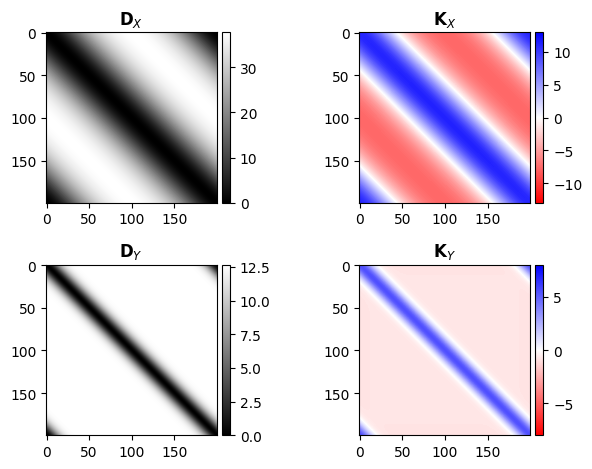

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(2, 2)
axes[0, 0].set_title(r"$\mathbf{D}_X$")
axes[0, 1].set_title(r"$\mathbf{K}_X$")
axes[1, 0].set_title(r"$\mathbf{D}_Y$")
axes[1, 1].set_title(r"$\mathbf{K}_Y$")
im00 = axes[0, 0].imshow(Dx, cmap='gray')
im01 = axes[0, 1].imshow(Kx, cmap='bwr_r', clim=[-13, 13])
im10 = axes[1, 0].imshow(Dy, cmap='gray')
im11 = axes[1, 1].imshow(Ky, cmap='bwr_r', clim=[-8, 8])
for ax, im in zip(axes.ravel(), (im00, im01, im10, im11)):
    plt.colorbar(
        im, cax=make_axes_locatable(ax).append_axes(
        "right", size="5%", pad=0.05
    ))
plt.tight_layout()

We see that the kernel matrices $\mathbf{K}_X$ and $\mathbf{K}_Y$ have positive and negative values whereas the RDMs $\mathbf{D}_X$ and $\mathbf{D}_Y$ have nonnegative entries (since squared Euclidean distance can't be negative). Besides this difference, the two look qualitatively similar in terms of their diagonal banding structure.

Quantitatively, let us confirm the relationship between $\mathbf{D}_X$ and $\mathbf{K}_X$ we stated above:

\begin{equation}
[\mathbf{D}_X]_{ij} = [\mathbf{K}_X]_{ii} + [\mathbf{K}_X]_{jj} - 2 [\mathbf{K}_X]_{ij}
\end{equation}

In [ ]:
print(
    np.linalg.norm(Dx - (np.diag(Kx)[:, None] + np.diag(Kx)[None, :] - 2 * Kx))
)
print(
    np.linalg.norm(Dy - (np.diag(Ky)[:, None] + np.diag(Ky)[None, :] - 2 * Ky))
)

1.3856515412919613e-12
5.91345972776291e-13


**Centering Matrix.** As it's name suggests, Centered Kernel Alignment compares network representations in terms of their *centered* kernel matrices. Recall from the first notebook our use of the $M \times M$ [centering matrix](https://en.wikipedia.org/wiki/Centering_matrix):

\begin{equation}
\mathbf{C} = \mathbf{I}_M - \frac{1}{M}\mathbf{11}^\top
\end{equation}

which we used to mean center the columns of the neural response matrix with the mapping $\mathbf{X} \mapsto \mathbf{CX}$.
The reader should learn two special and useful properties about the centering matrix: it is symmetric, meaning $\mathbf{C} = \mathbf{C}^\top$, and it is [idempotent](https://en.wikipedia.org/wiki/Idempotence), meaning $\mathbf{C}^2 = \mathbf{C}$.

**Connection betwen linear CKA and RSA.** If we compute the linear kernel matrix on centered neural responses we get the centered kernel matrix, $\mathbf{K}_X^C$, defined as:

\begin{equation}
\mathbf{K}_X^C = \mathbf{CK}_X \mathbf{C} = \mathbf{CXX}^\top \mathbf{C}
\end{equation}

CKA computes the similarity of two networks as the cosine similarity of their centered kernel matrices.
So for two neural response matrices $\mathbf{X}$ and $\mathbf{Y}$

\begin{equation}
\text{CKA}(\mathbf{X}, \mathbf{Y}) = \frac{\text{Tr}[\mathbf{K}_X^C \mathbf{K}_Y^C]}{\Vert \mathbf{K}_X^C \Vert_F \Vert \mathbf{K}_Y^C \Vert_F}
\end{equation}

It turns out that if one computes this *exact same similarity score* on the squared Euclidean distance RDM, you get the same result. Formally, if we define the centered RDM as $\mathbf{D}_X^C = \mathbf{CD}_X \mathbf{C}$ in analogy to the centered kernel matrix. Then,

\begin{equation}
\frac{\text{Tr}[\mathbf{D}_X^C \mathbf{D}_Y^C]}{\Vert \mathbf{D}_X^C \Vert_F \Vert \mathbf{D}_Y^C \Vert_F} = \text{CKA}(\mathbf{X}, \mathbf{Y})
\end{equation}

💪 **Exercise** 💪 *Using pen and paper, prove the equality stated above to show that RSA with squared Euclidean distance dissimilarity and a centered cosine similarity score is equivalent to linear CKA. **Hint:** it can help to first prove that:*

\begin{equation}
\mathbf{CD}_X \mathbf{C} = -2 \cdot \mathbf{CK}_X \mathbf{C}
\end{equation}

*The code below verifies both equalities.*

In [ ]:
# Define centering matrix
C = np.eye(num_conditions) - np.ones((num_conditions, num_conditions)) / num_conditions

# Centered RDMs
cDx = C @ Dx @ C
cDy = C @ Dy @ C

# Centered Kernel Matrices
cKx = C @ Kx @ C
cKy = C @ Ky @ C

# NOTE: It is unnecessary and computationally inefficient to explicitly define
#       the centering matrix `C` as we have done above. Instead one should use
#       `np.mean(...)`. However, in this tutorial we have tried to prioritize
#       clarity and conceptual understanding over computational efficiency.

In [ ]:
# Show that centered RDMs are negative two times the centered kernel matrices.
print(np.linalg.norm(cKx + 0.5 * cDx))
print(np.linalg.norm(cKy + 0.5 * cDy))

1.465883714251192e-12
6.477916200571767e-13


In [ ]:
# Show that CKA and RSA agree when using squared Euclidean RDMs and
# cosine similarity to compare centered RDMs and kernel matrices.
print("CKA = ", cosine_similarity(cKx, cKy))
print("RSA = ", cosine_similarity(cDx, cDy))

CKA =  0.7268216907780939
RSA =  0.7268216907780938


We have shown that RSA and CKA are equivalent when we make particular choices for the RDM matrix (squared Euclidean) and kernel matrices (linear kernel) and compare network representations using cosine similarity on centered RDM and centered kernel matrices. This leaves open the question: **what are the general conditions under which RSA and CKA are equivalent?**

We provide the answer as the following pair of exercises. These are somewhat advanced and may be skipped on first reading:

**Exercise 1.**
Let $\rho(\cdot, \cdot)$ be the distance function we use to construct the RDM, so $[\mathbf{D}_X]_{ij} = \rho(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_j)$.
Let $k(\cdot, \cdot)$ be the [positive definite kernel](https://en.wikipedia.org/wiki/Positive-definite_kernel) function we use construct the kernel matrix, so $[\mathbf{K}_X]_{ij} = k(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_j)$.
Then if:

\begin{equation}
\rho(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_j) = k(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_i) + k(\mathbf{\tilde{x}}_j, \mathbf{\tilde{x}}_j) - 2 k(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_j)
\end{equation}

show that we are guaranteed to have:

\begin{equation}
\mathbf{CD}_X \mathbf{C} = -2 \cdot \mathbf{CK}_X \mathbf{C}
\end{equation}

and therefore CKA and RSA coincide in the sense that:

\begin{equation}
\frac{\text{Tr}[\mathbf{K}_X^C \mathbf{K}_Y^C]}{\Vert \mathbf{K}_X^C \Vert_F \Vert \mathbf{K}_Y^C \Vert_F} = \frac{\text{Tr}[\mathbf{D}_X^C \mathbf{D}_Y^C]}{\Vert \mathbf{D}_X^C \Vert_F \Vert \mathbf{D}_Y^C \Vert_F}
\end{equation}

**Exercise 2.**
Use the results in [Sejdinovic et al. (2013)](https://www.jstor.org/stable/23566550) to argue that if $\rho(\cdot, \cdot)$ is a "semi-metric of negative type" then there exists a positive definite kernel function $k(\cdot, \cdot)$ that satisfies the necessary condition that:

\begin{equation}
\rho(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_j) = k(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_i) + k(\mathbf{\tilde{x}}_j, \mathbf{\tilde{x}}_j) - 2 k(\mathbf{\tilde{x}}_i, \mathbf{\tilde{x}}_j)
\end{equation}

Show that the squared Euclidean distance is a semi-metric of negative type and that the associated kernel is $k(\mathbf{u}, \mathbf{v}) = \mathbf{u}^\top \mathbf{v}$, in agreement with the results shown in this notebook.

## **Relationship between RSA/CKA and Procrustes Distance**

We have seen that RSA and CKA are two conceptually related frameworks for comparing neural representations. Furthermore, under certain circumstances they are equivalent.<sup>1</sup>
At a first glance, both of these methods appear very different than the Procrustes analysis framework explored in detail in Part 1.
To compute the Procrustes distance, we fit an optimal orthogonal alignment transformation $\mathbf{Q}$ in the $N$-dimensional neural response spaces between of two networks &mdash; we never computed an $M \times M$ (dis)similarity matrix between all pairs of stimulus conditions.

We now show that the Procrustes distance can actually be formulated in a manner that fits with the overall RSA/CKA framework. In fact, the Procrustes shape distance can be thought of as a comparison of centered linear kernel matrices, *but with a different notion of distance than the cosine similarity measure we used above*. This result is described in more detail by [Harvey et al. (2024)](https://proceedings.mlr.press/v243/harvey24a).

To begin, let's reimplement the Procrustes distance using the way we currently know how to compute it.

---

<sup>1</sup> *Or if one defines RSA as any method that compares $M \times M$ representational similarity or dissimilarity matrices, then CKA is in fact a special case of RSA.*

In [ ]:
def procrustes_first_way(X, Y):
    """
    Compute the Procrustes distance between X and Y by explicitly calculating
    the optimal orthogonal alignment.
    """
    # We are still assuming that number of neurons are matched between X and Y
    # for simplicity. Be patient, we will relax this momentarily.
    assert X.shape == Y.shape

    # Mean center the columns of X and Y.
    Xc = X - np.mean(X, axis=0)
    Yc = Y - np.mean(Y, axis=0)

    # Compute optimal choice for Q.
    U, S, Vt = np.linalg.svd(Xc.T @ Yc)
    Q = Vt.T @ U.T
    return np.linalg.norm(Xc - Yc @ Q, 'fro')

Now let's do another couple of short exercises 💪.
*(We already essentially derived these expressions in Part 1, so you can find a solution there.)*

For simplicity assume that $\mathbf{X}$ and $\mathbf{Y}$ have been pre-processed so that their columns are mean zero.

First, prove that:

\begin{equation}
\min_{\mathbf{Q} \in O(N)} \Vert \mathbf{X} - \mathbf{YQ}\Vert_F^2 = \text{Tr}[\mathbf{X}^\top \mathbf{X}] + \text{Tr}[\mathbf{Y}^\top \mathbf{Y}] - 2 \max_{\mathbf{Q} \in O(N)} \text{Tr}[\mathbf{X}^\top \mathbf{Y} \mathbf{Q}]
\end{equation}

Second, prove that:

\begin{equation}
\max_{\mathbf{Q} \in O(N)} \text{Tr}[\mathbf{X}^\top \mathbf{Y} \mathbf{Q}] = \Vert \mathbf{X}^\top \mathbf{Y} \Vert_*
\end{equation}

Where $\Vert \cdot \Vert_*$ is the **nuclear norm** of a matrix, and is equal to the sum of its singular values. The nuclear norm is also know as the Schatten 1-norm, see [Matrix norm](https://en.wikipedia.org/wiki/Matrix_norm).
Overall, this means that we can compute the Procrustes distance more directly, without explicitly instantiating the optimal $\mathbf{Q}$ matrix. We do this in the code block below.

In [ ]:
def procrustes_second_way(X, Y):
    """Compute the Procrustes distance between X and Y, a second way."""

    # Mean center the columns of X and Y.
    Xc = X - np.mean(X, axis=0)
    Yc = Y - np.mean(Y, axis=0)

    # Compute the singular values of X.T @ Y
    s_xy = np.linalg.svd(X.T @ Y, compute_uv=False)

    # Compute the Procrustes distance
    return np.sqrt(
        np.trace(X.T @ X) + np.trace(Y.T @ Y) - 2 * np.sum(s_xy)
    )

Let's check that this agrees with our first way of computing the Procrustes distance.

In [ ]:
# Should be a very small number
abs(procrustes_first_way(X, Y) - procrustes_second_way(X, Y))

5.684341886080802e-14

Here is where it gets more interesting. Again, for simplicity let us assume that the columns of $\mathbf{X}$ and $\mathbf{Y}$ have been pre-processed so that they are mean centered.

In our second function, we reformulated the Procrustes distance as:

\begin{equation}
d_{\text{Proc}}(\mathbf{X}, \mathbf{Y}) = \text{Tr}[\mathbf{X}^\top \mathbf{X}] + \text{Tr}[\mathbf{Y}^\top \mathbf{Y}] - 2 \Vert \mathbf{X}^\top \mathbf{Y} \Vert_*
\end{equation}

Recall that the trace of a matrix is equal to the [sum of its eigenvalues](https://en.wikipedia.org/wiki/Trace_(linear_algebra)#Trace_as_the_sum_of_eigenvalues).
Thus, the Procrustes distance is related to the eigenvalues of $\mathbf{X}^\top \mathbf{X}$ and $\mathbf{Y}^\top \mathbf{Y}$, which are symmetric $N \times N$ covariance matrices that capturing corelations between neurons within a network across the set of $M$ conditions.
It is also related to the singular values of $\mathbf{X}^\top \mathbf{Y}$, which is a non-symmetric $N \times N$ matrix.

But it turns out that we can express the Procrustes distance entirely in terms of the $M \times M$ linear kernel matrices $\mathbf{XX}^\top$ and $\mathbf{YY}^\top$. Specifically:

\begin{equation}
d_{\text{Proc}}(\mathbf{X}, \mathbf{Y}) = \text{Tr}[\mathbf{XX}^\top ] + \text{Tr}[\mathbf{YY}^\top] - 2 \text{Tr}[((\mathbf{XX}^\top)^{1/2}\mathbf{YY}^\top(\mathbf{XX}^\top)^{1/2})^{1/2}]
\end{equation}

A step-by-step explanation of this is given in [Harvey et al. (2024)](https://proceedings.mlr.press/v243/harvey24a).



In [ ]:
def posdefsqrt(A):
    """Compute the square root of a positive definite matrix `A`."""
    eigvals, U = np.linalg.eigh(A)
    return (U * np.sqrt(np.maximum(eigvals, 0.0))[None, :]) @ U.T

def procrustes_from_centered_kernel_matrices(cKx, cKy):

    # Compute the fidelity between the centered kernel matrices.
    cKx_sqr = posdefsqrt(cKx)
    fidelity = np.trace(posdefsqrt(cKx_sqr @ cKy @ cKx_sqr))

    # Compute the Bures distance between cKx and cKy. This is equal
    # to the Procrustes distance.
    return np.sqrt(
        np.trace(cKx) + np.trace(cKy) - 2 * fidelity
    )

In [ ]:
# Should be a small number (slightly less small due to numerical instabilities).
abs(procrustes_first_way(X, Y) - procrustes_from_centered_kernel_matrices(cKx, cKy))

6.473017570840511e-06